### Projekt 3 


In [1]:
%load_ext autoreload
%autoreload 2

## Zadanie 1.

Wczytaj dane dla lat 2014, 2019 i 2024, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden DataFrame i zapisz do pliku.

In [2]:
import data_loader

In [3]:
# id archiwum dla poszczególnych lat
gios_url_ids = {2015: '236', 2018: '603', 2021: '486', 2024: '582', 'meta': '622'}
gios_pm25_file = {2015: '2015_PM25_1g.xlsx', 2018: '2018_PM25_1g.xlsx', 2021: '2021_PM25_1g.xlsx' ,2024: '2024_PM25_1g.xlsx'}

# lata, które chcemy analizować
# ale żem napisał analyze XD
years_to_analize = [2015, 2018, 2021, 2024]

In [4]:
df_meta = data_loader.download_meta_data(gios_url_ids['meta'])

In [5]:
df_meta

,Nr,Kod międzynarodowy,Nazwa stacji,Stary Kod stacji \n(o ile inny od aktualnego),Data uruchomienia,Data zamknięcia,Typ stacji,Typ obszaru,Rodzaj stacji,Województwo,Miejscowość,Adres,WGS84 φ N,WGS84 λ E
Kod stacji,,,,,,,,,,,,,,
DsBialka,1,NaN,Białka,NaN,1990-01-03,2005-12-31,przemysłowa,podmiejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Białka,NaN,51.197783,16.117390
DsBielGrot,2,NaN,Bielawa - ul. Grota Roweckiego,NaN,1994-01-02,2003-12-31,tło,miejski,w budynku,DOLNOŚLĄSKIE,Bielawa,ul. Grota Roweckiego 6,50.682510,16.617348
DsBogatFrancMOB,3,PL0602A,Bogatynia Mobil,DsBogatMob,2015-01-01,2015-12-31,tło,miejski,mobilna,DOLNOŚLĄSKIE,Bogatynia,ul. Francuska/Kręta,50.940998,14.916790
DsBogChop,4,PL0315A,Bogatynia - Chopina,NaN,1996-01-01,2013-12-31,przemysłowa,miejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Bogatynia,ul. Chopina 35,50.905856,14.967175
DsBogZatonieMob,5,PL0576A,Bogatynia - Mobil,NaN,2012-01-01,2012-12-31,przemysłowa,miejski,mobilna,DOLNOŚLĄSKIE,Bogatynia,"ul. Konrada, Zatonie",50.943245,14.913327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZpSzczPilsud,1130,PL0249A,"Szczecin, ul. Piłsudskiego","ZpSzczecin002, ZpSzczPils02",2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.553900
ZpSzczWSSEEnerg,1131,NaN,Energetyków,NaN,1992-01-01,2003-12-31,komunikacyjna,miejski,w budynku,ZACHODNIOPOMORSKIE,Szczecin,ul. Energetyków 2,53.420475,14.561934
ZpSzczWSSESped6,1132,NaN,Spedytorska,NaN,1992-01-01,2004-01-01,tło,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Spedytorska 6,53.415043,14.555347


In [6]:
df_all = {}
for i in years_to_analize:
    df_all[i] = data_loader.download_gios_archive(i, gios_url_ids[i], gios_pm25_file[i])

pobieram dane z roku 2015
pobieram dane z roku 2018
pobieram dane z roku 2021
pobieram dane z roku 2024


In [7]:
df_all[2015]

,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpToruDziewu,LbLubObywate,LdLodzCzerni,LdLodzGdansk,LdZgieMielcz,...,SkMalo11List,SkPolaRuszcz,SlGliwicMewy,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,WpPoznPolank,ZpSzczAndr01,ZpSzczPils02
Kod stacji,,,,,,,,,,,,,,,,,,,,,
Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
2015-01-01 01:00:00,151.112,78,50,29.2,95.5,27.352,71.1012,59.73,NaN,58.690689,...,39.6,72.4,77.828,51.389,49.9464,44.060833,25.5,24.4768,NaN,NaN
2015-01-01 02:00:00,262.566,42,33.8244,27.1,86.1,78.0064,95.2582,185.92,NaN,44.501255,...,33.6,57.2,50.0552,37.709,45.6291,49.943329,32.5,29.86,81.8501,215.379
2015-01-01 03:00:00.005000,222.83,27,28.7215,7.9,23.8,21.1056,49.5078,54.25,NaN,24.163937,...,35,41.9,52.0277,41.984,49.2093,20.688448,24.3,29.3744,25.7333,27.7458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 20:00:43.770000,13.7734,29.2072,24.4965,NaN,76.2,NaN,62.7976,31,57,30,...,28,59,205.944,158.52,42.9334,34.510277,75.05,36.3858,30.6219,30.2969
2015-12-31 21:00:43.775000,20.8195,36.8677,39.4025,55.4,66.9,NaN,105.59,46,60,30,...,36.8,57.4,218.516,143.729,45,35.861,62.8491,40.31,50.1254,27.2376
2015-12-31 22:00:43.780000,11.7978,61.041,52.4493,NaN,69.2,NaN,232.0938,46,58,32,...,33.3,73.8,169.238,131.673,63.9197,36.309914,70.6655,43.079,38.0602,28.3642


In [8]:
df_all[2018].head(10)

,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpToruDziewu,KpWloclOkrze,LbLubObywate,LdLodzCzerni,LdLodzGdansk,...,SkKonsGranatMOB,SkPolaRuszcz,SlBielPartyz,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,WpPoznDabrow,ZpSzczAndr01,ZpSzczPils02
Kod stacji,,,,,,,,,,,,,,,,,,,,,
Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
Czas pomiaru,DsJelGorOgin-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpBydWarszaw-PM2.5-1g,KpToruDziewu-PM2.5-1g,KpWloclOkrze-PM2.5-1g,LbLubObywate-PM2.5-1g,LdLodzCzerni-PM2.5-1g,LdLodzGdansk-PM2.5-1g,...,SkKonsGranatMOB-PM2.5-1g,SkPolaRuszcz-PM2.5-1g,SlBielPartyz-PM2.5-1g,SlKatoKossut-PM2.5-1g,SlZlotPotLes-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WpKaliSawick-PM2.5-1g,WpPoznDabrow-PM2.5-1g,ZpSzczAndr01-PM2.5-1g,ZpSzczPils02-PM2.5-1g
2018-01-01 01:00:00,"43,0102","71,494","70,2","49,2716","69,6873","18,778",NaN,"30,9","16,0","68,349",...,NaN,"27,68",NaN,"76,8469","25,9266","41,3687",NaN,NaN,"26,5445","12,8035"
2018-01-01 02:00:00,"5,38425","7,89305","13,1522","36,236","42,3178",NaN,NaN,"54,8","83,0","39,999",...,NaN,"18,48",NaN,"39,3395","32,7522","25,8502",NaN,NaN,NaN,NaN
2018-01-01 03:00:00,"4,52882","12,5392","12,5","14,7514",NaN,NaN,NaN,"24,3","16,0","17,949",...,NaN,"15,59",NaN,"23,2554","37,6664","22,4599",NaN,NaN,"10,4332","32,0944"
2018-01-01 04:00:00,"8,68036","5,03196","8,85164","17,1654",NaN,"13,353",NaN,"15,1","14,0","12,699",...,NaN,"12,32",NaN,"22,3614","32,4625","20,1625",NaN,NaN,"28,1885","27,3274"
2018-01-01 05:00:00,"7,2","11,9136","7,29656","12,5788",NaN,NaN,NaN,"12,6","12,0","12,699",...,NaN,"10,03",NaN,"28,9092","27,135","18,3681",NaN,NaN,"40,1738","61,1957"


In [9]:
df_all[2021].head(10)

,DsJelGorOgin,DsKlodzSzkol,DsMiliczMOB,DsSrodaSlMOB,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpNaklWawrzy,KpSolecRowecMOB,...,WmElbBazynsk,WmElkStadion,WmOlsPuszkin,WmOstrPilsud,WpKaliSawick,WpPoznDabrow,WpSzamotKollMOB,ZpKolKasprowMOB,ZpSzczAndrze,ZpSzczPilsud
Kod stacji,,,,,,,,,,,,,,,,,,,,,
Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
Kod stanowiska,DsJelGorOgin-PM2.5-1g,DsKlodzSzkol-PM2.5-1g,DsMiliczMOB-PM2.5-1g,DsSrodaSlMOB-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpBydWarszaw-PM2.5-1g,KpNaklWawrzy-PM2.5-1g,KpSolecRowecMOB-PM2.5-1g,...,WmElbBazynsk-PM2.5-1g,WmElkStadion-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WmOstrPilsud-PM2.5-1g,WpKaliSawick-PM2.5-1g,WpPoznDabrow-PM2.5-1g,WpSzamotKollMOB-PM2.5-1g,ZpKolKasprowMOB-PM2.5-1g,ZpSzczAndrze-PM2.5-1g,ZpSzczPilsud-PM2.5-1g
2021-01-01 01:00:00,197.186,248.839,NaN,49.5095,54.4324,63.7997,40.3,85.1,NaN,NaN,...,56.6378,9.38025,51.3952,34.6636,62.0383,NaN,NaN,NaN,64.707,43.71
2021-01-01 02:00:00,183.49,243.939,NaN,35.6942,46.4216,37.515,42,23.6,NaN,NaN,...,26.9544,11.4654,29.522,27.4025,39.8476,NaN,NaN,NaN,65.083,47.8319
2021-01-01 03:00:00,171.491,201.172,NaN,33.1582,39.1327,35.6783,44.9,16.5,NaN,NaN,...,25.8519,14.176,21.2986,26.8385,32.0559,NaN,NaN,NaN,37.0403,34.9022
2021-01-01 04:00:00,160.902,153.2,NaN,31.3283,37.8325,37.0194,37.6,14.5,NaN,NaN,...,24.3014,10.432,20.0765,23.9346,32.7733,NaN,NaN,NaN,36.7025,30.2011
2021-01-01 05:00:00,145.648,131.731,NaN,28.5575,34.5285,35.4448,NaN,12.5,NaN,NaN,...,23.9529,7.96,17.6198,24.2035,30.8214,NaN,NaN,NaN,37.0658,30.0522


In [10]:
df_all[2024].head(10)

,DsChojnowMalMOB,DsJelGorOgin,DsKlodzSzkol,DsKudowaSzkoMOB,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpNaklWawrzy,KpSwiecJPawlMOB,...,WmElkStadion,WmOlsPuszkin,WpKaliSawick,WpKoscianMayMOB,WpPoznDabrow,WpPoznSzwajc,ZpDabkiSztorMOB,ZpKolZolkiew,ZpSzczAndrze,ZpSzczPilsud
Kod stacji,,,,,,,,,,,,,,,,,,,,,
Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
Kod stanowiska,DsChojnowMalMOB-PM2.5-1g,DsJelGorOgin-PM2.5-1g,DsKlodzSzkol-PM2.5-1g,DsKudowaSzkoMOB-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpBydWarszaw-PM2.5-1g,KpNaklWawrzy-PM2.5-1g,KpSwiecJPawlMOB-PM2.5-1g,...,WmElkStadion-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WpKaliSawick-PM2.5-1g,WpKoscianMayMOB-PM2.5-1g,WpPoznDabrow-PM2.5-1g,WpPoznSzwajc-PM2.5-1g,ZpDabkiSztorMOB-PM2.5-1g,ZpKolZolkiew-PM2.5-1g,ZpSzczAndrze-PM2.5-1g,ZpSzczPilsud-PM2.5-1g
2024-01-01 01:00:00,NaN,30.8,53.5,NaN,94,58.3,28.5,110.9,96.8,54.7,...,48.6,37.4,69.9,90.2,41.3,67.9,26.5,63.9,49.9,57.6
2024-01-01 02:00:00,NaN,30.2,61.3,NaN,44.8,44.8,73.9,39.5,37,23.2,...,12.8,18.8,57.1,55.4,38.4,88.7,26.8,33.5,15.4,24.6
2024-01-01 03:00:00,NaN,22.4,56.1,NaN,20.2,30.5,66.5,39.6,43.6,25.3,...,11,19,56,46.1,25.8,84.6,24.9,32.9,14.3,21.7
2024-01-01 04:00:00,NaN,11.2,27.6,NaN,14.7,18.5,66.8,36.2,42.6,26,...,10,18.7,44.1,26.9,16.3,75.8,26.4,32.6,17,20.1
2024-01-01 05:00:00,NaN,22.5,25.8,NaN,17.2,18,58.4,35.6,41.4,26.8,...,8.4,19,40.5,22.2,12.6,50.8,28.7,31,27.2,19.7


In [11]:
import data_cleaner

In [12]:
# tablica z nazwami wierszy, które zamierzamy usunąć (korzystając z analiz wykonanych w projekcie 1 i ewentualnie powyższych podglądów tabel
rows_to_delete = ["Wskaźnik", "Czas uśredniania", "Czas pomiaru", "Jednostka", "Kod stanowiska"]

In [13]:
for i in years_to_analize:
    df_all[i] = data_cleaner.delete_rows(i, df_all[i], rows_to_delete)

W tabeli 2015 usunięto wiersz Wskaźnik
W tabeli 2015 usunięto wiersz Czas uśredniania
W tabeli 2015 nie ma wiersza Czas pomiaru, zatem pomijam usuwanie.
W tabeli 2015 nie ma wiersza Jednostka, zatem pomijam usuwanie.
W tabeli 2015 nie ma wiersza Kod stanowiska, zatem pomijam usuwanie.
W tabeli 2018 usunięto wiersz Wskaźnik
W tabeli 2018 usunięto wiersz Czas uśredniania
W tabeli 2018 usunięto wiersz Czas pomiaru
W tabeli 2018 usunięto wiersz Jednostka
W tabeli 2018 nie ma wiersza Kod stanowiska, zatem pomijam usuwanie.
W tabeli 2021 usunięto wiersz Wskaźnik
W tabeli 2021 usunięto wiersz Czas uśredniania
W tabeli 2021 nie ma wiersza Czas pomiaru, zatem pomijam usuwanie.
W tabeli 2021 usunięto wiersz Jednostka
W tabeli 2021 usunięto wiersz Kod stanowiska
W tabeli 2024 usunięto wiersz Wskaźnik
W tabeli 2024 usunięto wiersz Czas uśredniania
W tabeli 2024 nie ma wiersza Czas pomiaru, zatem pomijam usuwanie.
W tabeli 2024 usunięto wiersz Jednostka
W tabeli 2024 usunięto wiersz Kod stanowiska


In [14]:
df_all[2024]

,DsChojnowMalMOB,DsJelGorOgin,DsKlodzSzkol,DsKudowaSzkoMOB,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpNaklWawrzy,KpSwiecJPawlMOB,...,WmElkStadion,WmOlsPuszkin,WpKaliSawick,WpKoscianMayMOB,WpPoznDabrow,WpPoznSzwajc,ZpDabkiSztorMOB,ZpKolZolkiew,ZpSzczAndrze,ZpSzczPilsud
Kod stacji,,,,,,,,,,,,,,,,,,,,,
2024-01-01 01:00:00,NaN,30.8,53.5,NaN,94,58.3,28.5,110.9,96.8,54.7,...,48.6,37.4,69.9,90.2,41.3,67.9,26.5,63.9,49.9,57.6
2024-01-01 02:00:00,NaN,30.2,61.3,NaN,44.8,44.8,73.9,39.5,37,23.2,...,12.8,18.8,57.1,55.4,38.4,88.7,26.8,33.5,15.4,24.6
2024-01-01 03:00:00,NaN,22.4,56.1,NaN,20.2,30.5,66.5,39.6,43.6,25.3,...,11,19,56,46.1,25.8,84.6,24.9,32.9,14.3,21.7
2024-01-01 04:00:00,NaN,11.2,27.6,NaN,14.7,18.5,66.8,36.2,42.6,26,...,10,18.7,44.1,26.9,16.3,75.8,26.4,32.6,17,20.1
2024-01-01 05:00:00,NaN,22.5,25.8,NaN,17.2,18,58.4,35.6,41.4,26.8,...,8.4,19,40.5,22.2,12.6,50.8,28.7,31,27.2,19.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 20:00:00,53,48.3,34.3,28.4,51.4,27.7,5.4,34.1,43.1,24.5,...,13.5,16,25.4,NaN,22,35.3,NaN,10.9,8.4,14
2024-12-31 21:00:00,33.7,67,33.3,33.6,65.5,19.9,7.7,34.6,29.4,22.8,...,11.8,19.3,25,NaN,22.9,28.5,NaN,9,12.8,12.7
2024-12-31 22:00:00,57.7,72.7,32.4,44.1,30.2,17.4,14.5,29.3,12.7,20.2,...,9.6,26.9,24,NaN,21.3,23.4,NaN,8.2,20.7,12.1


In [15]:
df_meta

,Nr,Kod międzynarodowy,Nazwa stacji,Stary Kod stacji \n(o ile inny od aktualnego),Data uruchomienia,Data zamknięcia,Typ stacji,Typ obszaru,Rodzaj stacji,Województwo,Miejscowość,Adres,WGS84 φ N,WGS84 λ E
Kod stacji,,,,,,,,,,,,,,
DsBialka,1,NaN,Białka,NaN,1990-01-03,2005-12-31,przemysłowa,podmiejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Białka,NaN,51.197783,16.117390
DsBielGrot,2,NaN,Bielawa - ul. Grota Roweckiego,NaN,1994-01-02,2003-12-31,tło,miejski,w budynku,DOLNOŚLĄSKIE,Bielawa,ul. Grota Roweckiego 6,50.682510,16.617348
DsBogatFrancMOB,3,PL0602A,Bogatynia Mobil,DsBogatMob,2015-01-01,2015-12-31,tło,miejski,mobilna,DOLNOŚLĄSKIE,Bogatynia,ul. Francuska/Kręta,50.940998,14.916790
DsBogChop,4,PL0315A,Bogatynia - Chopina,NaN,1996-01-01,2013-12-31,przemysłowa,miejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Bogatynia,ul. Chopina 35,50.905856,14.967175
DsBogZatonieMob,5,PL0576A,Bogatynia - Mobil,NaN,2012-01-01,2012-12-31,przemysłowa,miejski,mobilna,DOLNOŚLĄSKIE,Bogatynia,"ul. Konrada, Zatonie",50.943245,14.913327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZpSzczPilsud,1130,PL0249A,"Szczecin, ul. Piłsudskiego","ZpSzczecin002, ZpSzczPils02",2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.553900
ZpSzczWSSEEnerg,1131,NaN,Energetyków,NaN,1992-01-01,2003-12-31,komunikacyjna,miejski,w budynku,ZACHODNIOPOMORSKIE,Szczecin,ul. Energetyków 2,53.420475,14.561934
ZpSzczWSSESped6,1132,NaN,Spedytorska,NaN,1992-01-01,2004-01-01,tło,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Spedytorska 6,53.415043,14.555347


In [16]:
df_all = data_cleaner.unify_station_codes(df_all, df_meta)
print("Gotowe.")

[2015] Iteracja 1: zaktualizowano 5 kodów stacji.
[2018] Iteracja 1: zaktualizowano 7 kodów stacji.
[2021] Iteracja 1: zaktualizowano 1 kodów stacji.
Gotowe.


In [17]:
df_all = data_cleaner.filter_common_stations(df_all)

# Sprawdzenie czy zadziałało (wymiary powinny mieć tę samą liczbę kolumn)
for year, df in df_all.items():
    print(f"Rok {year}: wymiary {df.shape}")

Znaleziono 30 wspólnych stacji dla wszystkich lat.

Rok 2015: usunięto 12 stacji (pozostało 30).
Rok 2018: usunięto 21 stacji (pozostało 30).
Rok 2021: usunięto 58 stacji (pozostało 30).
Rok 2024: usunięto 66 stacji (pozostało 30).
Rok 2015: wymiary (8760, 30)
Rok 2018: wymiary (8760, 30)
Rok 2021: wymiary (8760, 30)
Rok 2024: wymiary (8784, 30)


In [18]:
df_all = data_cleaner.add_city_to_columns(df_all, df_meta)

Rok 2015: przypisano miasto do 30/30 stacji.
Rok 2018: przypisano miasto do 30/30 stacji.
Rok 2021: przypisano miasto do 30/30 stacji.
Rok 2024: przypisano miasto do 30/30 stacji.


In [19]:
df_all[2024]

Kod stacji,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,LbLubObywate,LdLodzCzerni,LdZgieMielcz,LuZielKrotka,MpKrakAlKras,...,PdBialUpalna,PkPrzemGrunw,PmGdaLeczkow,PmKosTargowa,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,ZpSzczAndrze,ZpSzczPilsud
Miejscowość,Jelenia Góra,Wrocław,Wrocław,Bydgoszcz,Bydgoszcz,Lublin,Łódź,Zgierz,Zielona Góra,Kraków,...,Białystok,Przemyśl,Gdańsk,Kościerzyna,Katowice,Złoty Potok,Olsztyn,Kalisz,Szczecin,Szczecin
Kod stacji,,,,,,,,,,,,,,,,,,,,,
2024-01-01 01:00:00,30.8,94,58.3,28.5,110.9,76.1,43.2,68.4,38.3,68.6,...,NaN,10.4,27.9,24,75.8,25.2,37.4,69.9,49.9,57.6
2024-01-01 02:00:00,30.2,44.8,44.8,73.9,39.5,61.4,39.2,66.1,13.6,57.4,...,NaN,9.8,21.7,19.4,92.5,22.5,18.8,57.1,15.4,24.6
2024-01-01 03:00:00,22.4,20.2,30.5,66.5,39.6,45.3,39.2,49.2,15.9,56.3,...,NaN,12.1,21.1,19.3,100.6,28.8,19,56,14.3,21.7
2024-01-01 04:00:00,11.2,14.7,18.5,66.8,36.2,49.6,40.2,40.6,13.4,66.1,...,NaN,14.5,20.7,19.4,60.5,31.6,18.7,44.1,17,20.1
2024-01-01 05:00:00,22.5,17.2,18,58.4,35.6,56.2,40.2,40.7,13.1,63.7,...,NaN,16.8,19.8,19,60,22.5,19,40.5,27.2,19.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 20:00:00,48.3,51.4,27.7,5.4,34.1,26.3,33.3,49.5,15.9,57,...,10,19.7,11.2,14.1,20.3,23.8,16,25.4,8.4,14
2024-12-31 21:00:00,67,65.5,19.9,7.7,34.6,27.5,34,48.7,16.1,58.7,...,18,19.3,14,12.6,20.1,28.4,19.3,25,12.8,12.7


In [20]:
df_final = data_cleaner.combine_dataframes(df_all)
print("\nPodgląd połączonych danych:")
display(df_final.head())
display(df_final.tail())

# Sprawdzenie czy indeks na pewno jest datą
print("\nTyp indeksu:", df_final.index)

Połączono 4 roczników.
Wynikowy rozmiar: (35064, 30)

Podgląd połączonych danych:


Kod stacji,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,LbLubObywate,LdLodzCzerni,LdZgieMielcz,LuZielKrotka,MpKrakAlKras,...,PdBialUpalna,PkPrzemGrunw,PmGdaLeczkow,PmKosTargowa,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,ZpSzczAndrze,ZpSzczPilsud
Miejscowość,Jelenia Góra,Wrocław,Wrocław,Bydgoszcz,Bydgoszcz,Lublin,Łódź,Zgierz,Zielona Góra,Kraków,...,Białystok,Przemyśl,Gdańsk,Kościerzyna,Katowice,Złoty Potok,Olsztyn,Kalisz,Szczecin,Szczecin
Kod stacji,,,,,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00.000,151.112,78,50,29.2,95.5,71.1012,59.73,58.690689,NaN,73,...,67,18.9027,NaN,NaN,51.389,49.9464,44.060833,25.5,NaN,NaN
2015-01-01 02:00:00.000,262.566,42,33.8244,27.1,86.1,95.2582,185.92,44.501255,51.8628,55,...,103,15.9257,75.5278,NaN,37.709,45.6291,49.943329,32.5,81.8501,215.379
2015-01-01 03:00:00.005,222.83,27,28.7215,7.9,23.8,49.5078,54.25,24.163937,15.866,61,...,49,16.1709,8.87389,NaN,41.984,49.2093,20.688448,24.3,25.7333,27.7458
2015-01-01 04:00:00.010,210.767,24,20.6891,7.1,15.9,60.8468,50.15,19.516039,20.1187,62,...,37,16.0252,8.83194,22.7895,45.404,53.316,17.437717,24.4,18.624,26.5201
2015-01-01 05:00:00.015,191.211,22,22.5335,9.2,15,49.3106,39.17,16.850332,27.3413,57,...,27,15.5498,6.5675,NaN,36.854,51.5259,15.532262,25,17.6545,31.0393


Kod stacji,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,LbLubObywate,LdLodzCzerni,LdZgieMielcz,LuZielKrotka,MpKrakAlKras,...,PdBialUpalna,PkPrzemGrunw,PmGdaLeczkow,PmKosTargowa,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,ZpSzczAndrze,ZpSzczPilsud
Miejscowość,Jelenia Góra,Wrocław,Wrocław,Bydgoszcz,Bydgoszcz,Lublin,Łódź,Zgierz,Zielona Góra,Kraków,...,Białystok,Przemyśl,Gdańsk,Kościerzyna,Katowice,Złoty Potok,Olsztyn,Kalisz,Szczecin,Szczecin
Kod stacji,,,,,,,,,,,,,,,,,,,,,
2024-12-31 20:00:00,48.3,51.4,27.7,5.4,34.1,26.3,33.3,49.5,15.9,57,...,10,19.7,11.2,14.1,20.3,23.8,16,25.4,8.4,14
2024-12-31 21:00:00,67,65.5,19.9,7.7,34.6,27.5,34,48.7,16.1,58.7,...,18,19.3,14,12.6,20.1,28.4,19.3,25,12.8,12.7
2024-12-31 22:00:00,72.7,30.2,17.4,14.5,29.3,26.9,31.7,48.1,15.9,67.9,...,15,17.4,15.8,10.9,27.3,22.5,26.9,24,20.7,12.1
2024-12-31 23:00:00,79.9,36,23.6,NaN,16,23.5,26.8,38.4,12.5,75.3,...,13,15.1,16.1,10.2,26.4,25.3,23,23.6,13.4,12.7
2025-01-01 00:00:00,67.9,50.4,35.4,15.7,13.4,21.4,37.3,45.5,14.7,75.5,...,15,15.1,17.4,8,27,20.6,23.4,25,15.6,11.5



Typ indeksu: DatetimeIndex([       '2015-01-01 01:00:00',        '2015-01-01 02:00:00',
               '2015-01-01 03:00:00.005000', '2015-01-01 04:00:00.010000',
               '2015-01-01 05:00:00.015000', '2015-01-01 06:00:00.020000',
               '2015-01-01 07:00:00.025000', '2015-01-01 08:00:00.030000',
               '2015-01-01 09:00:00.035000', '2015-01-01 10:00:00.040000',
               ...
                      '2024-12-31 15:00:00',        '2024-12-31 16:00:00',
                      '2024-12-31 17:00:00',        '2024-12-31 18:00:00',
                      '2024-12-31 19:00:00',        '2024-12-31 20:00:00',
                      '2024-12-31 21:00:00',        '2024-12-31 22:00:00',
                      '2024-12-31 23:00:00',        '2025-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Kod stacji', length=35064, freq=None)


In [21]:
df_final = data_cleaner.fix_midnight_dates(df_final)

display(df_final.head())
display(df_final.tail())


Kod stacji,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,LbLubObywate,LdLodzCzerni,LdZgieMielcz,LuZielKrotka,MpKrakAlKras,...,PdBialUpalna,PkPrzemGrunw,PmGdaLeczkow,PmKosTargowa,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,ZpSzczAndrze,ZpSzczPilsud
Miejscowość,Jelenia Góra,Wrocław,Wrocław,Bydgoszcz,Bydgoszcz,Lublin,Łódź,Zgierz,Zielona Góra,Kraków,...,Białystok,Przemyśl,Gdańsk,Kościerzyna,Katowice,Złoty Potok,Olsztyn,Kalisz,Szczecin,Szczecin
Data,,,,,,,,,,,,,,,,,,,,,
2015-01-01,151.112,78,50,29.2,95.5,71.1012,59.73,58.690689,NaN,73,...,67,18.9027,NaN,NaN,51.389,49.9464,44.060833,25.5,NaN,NaN
2015-01-01,262.566,42,33.8244,27.1,86.1,95.2582,185.92,44.501255,51.8628,55,...,103,15.9257,75.5278,NaN,37.709,45.6291,49.943329,32.5,81.8501,215.379
2015-01-01,222.83,27,28.7215,7.9,23.8,49.5078,54.25,24.163937,15.866,61,...,49,16.1709,8.87389,NaN,41.984,49.2093,20.688448,24.3,25.7333,27.7458
2015-01-01,210.767,24,20.6891,7.1,15.9,60.8468,50.15,19.516039,20.1187,62,...,37,16.0252,8.83194,22.7895,45.404,53.316,17.437717,24.4,18.624,26.5201
2015-01-01,191.211,22,22.5335,9.2,15,49.3106,39.17,16.850332,27.3413,57,...,27,15.5498,6.5675,NaN,36.854,51.5259,15.532262,25,17.6545,31.0393


Kod stacji,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,LbLubObywate,LdLodzCzerni,LdZgieMielcz,LuZielKrotka,MpKrakAlKras,...,PdBialUpalna,PkPrzemGrunw,PmGdaLeczkow,PmKosTargowa,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,ZpSzczAndrze,ZpSzczPilsud
Miejscowość,Jelenia Góra,Wrocław,Wrocław,Bydgoszcz,Bydgoszcz,Lublin,Łódź,Zgierz,Zielona Góra,Kraków,...,Białystok,Przemyśl,Gdańsk,Kościerzyna,Katowice,Złoty Potok,Olsztyn,Kalisz,Szczecin,Szczecin
Data,,,,,,,,,,,,,,,,,,,,,
2024-12-31,48.3,51.4,27.7,5.4,34.1,26.3,33.3,49.5,15.9,57,...,10,19.7,11.2,14.1,20.3,23.8,16,25.4,8.4,14
2024-12-31,67,65.5,19.9,7.7,34.6,27.5,34,48.7,16.1,58.7,...,18,19.3,14,12.6,20.1,28.4,19.3,25,12.8,12.7
2024-12-31,72.7,30.2,17.4,14.5,29.3,26.9,31.7,48.1,15.9,67.9,...,15,17.4,15.8,10.9,27.3,22.5,26.9,24,20.7,12.1
2024-12-31,79.9,36,23.6,NaN,16,23.5,26.8,38.4,12.5,75.3,...,13,15.1,16.1,10.2,26.4,25.3,23,23.6,13.4,12.7
2024-12-31,67.9,50.4,35.4,15.7,13.4,21.4,37.3,45.5,14.7,75.5,...,15,15.1,17.4,8,27,20.6,23.4,25,15.6,11.5


In [22]:
df_final, changes = data_cleaner.normalize_dataframe(df_final)

print(f"Łączna liczba zamienionych komórek: {changes}")

Łączna liczba zamienionych komórek: 343694


## Zadanie 2.

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla Warszawy i Katowic, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

Aktualizacja zadania: 
porównanie danych dla Warszawy i Katowic w zadaniu 2 należy zrobić dla lat 2015 i 2024

In [23]:
import data_statistics

In [24]:
miasta = ["Katowice", "Warszawa"]
lata = [2015, 2024]

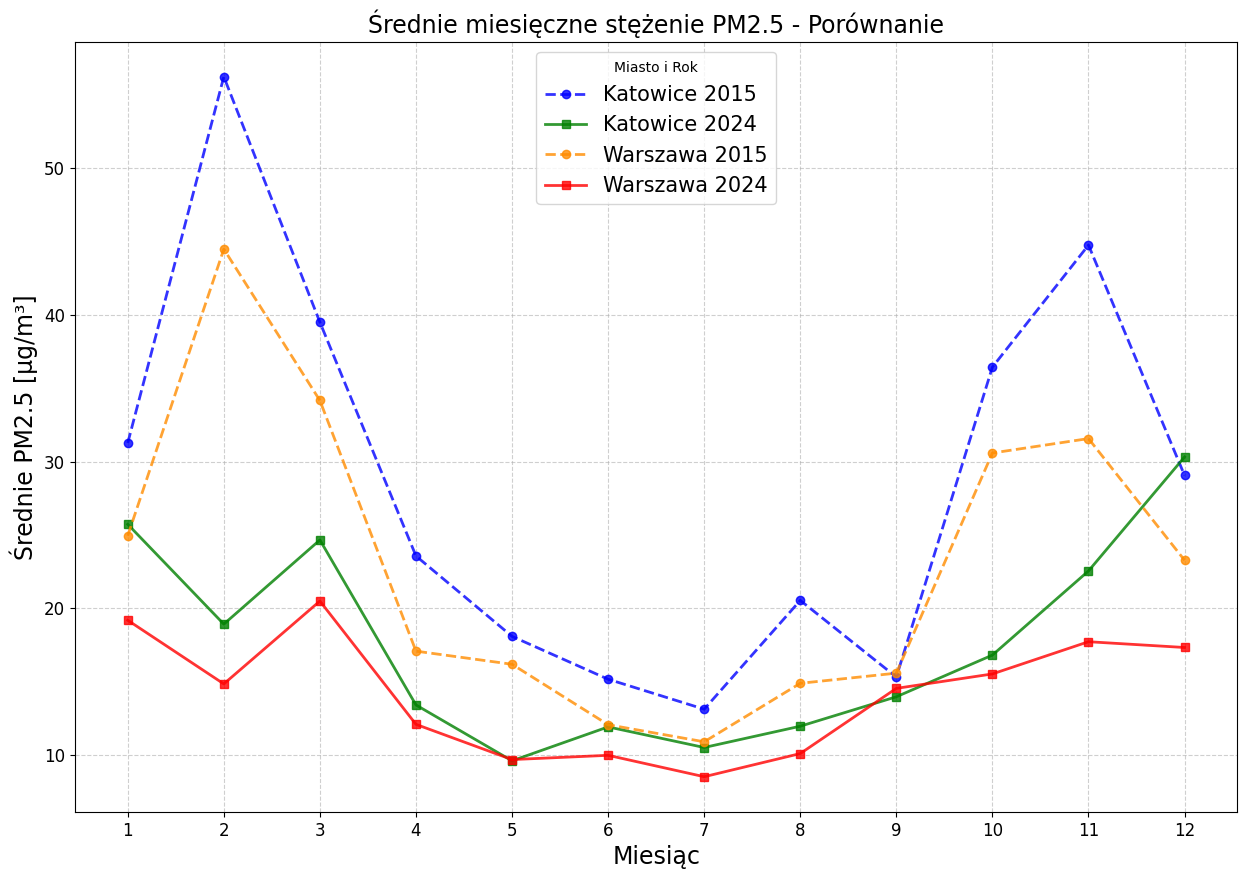

In [25]:
statystyki = data_statistics.calculate_monthly_city_stats(df_final, miasta, lata)

data_statistics.plot_city_comparison(statystyki)

##### Wnioski:

(generalnie bardzo podobne jak w przypadku projektu 1

Wykres liniowy przedstawia zmiany średniego miesięcznego stężenia pyłu zawieszonego PM2.5 (w mikrogramach na metr sześcienny, µg/m³) w ciągu roku dla dwóch miast: Warszawy i Katowic. Dla każdego z miast porównane są dwa lata: 2015 (linia przerywana) i 2024 (linia ciągła).

Oś pozioma (X): Przedstawia miesiące roku, od stycznia (1) do grudnia (12). Oś pionowa (Y): Przedstawia średnie stężenie PM2.5 w µg/m³.

Linie niebieska i zielona: reprezentują Katowice w odpowiednio 2015 i 2024 roku

Linie pomarańczowa i czerwona: Reprezentują Warszawę odpowiednio w 2015 i 2024 roku

Możemy zauważyć, że w roku 2015 zarówno w Katowicach jak i w Warszawie stężenie PM2.5 było większe niż w roku 2024. Na wykresie widać również, że to stężenie jest większe w miesiącach zimowych, a mniejsze w letnich. Zimą w Katowicach wartości PM2.5 są wyższe niż w Warszawie - może tak być ze względu na ogrzewanie i przemysł.

## Zadanie 3

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

c:\Users\Himomo\Documents\UW Studia\rok 3\ztp\projekt3\maly_projekt_3\data_statistics.py:116: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  city_means = monthly_mean.groupby(level=1, axis=1).mean()


,rok,miesiac,Miejscowość,pm25
0,2015,1,Białystok,22.458108
1,2015,1,Bydgoszcz,23.461470
2,2015,1,Gdańsk,15.260864
3,2015,1,Jelenia Góra,24.520156
4,2015,1,Kalisz,32.039201


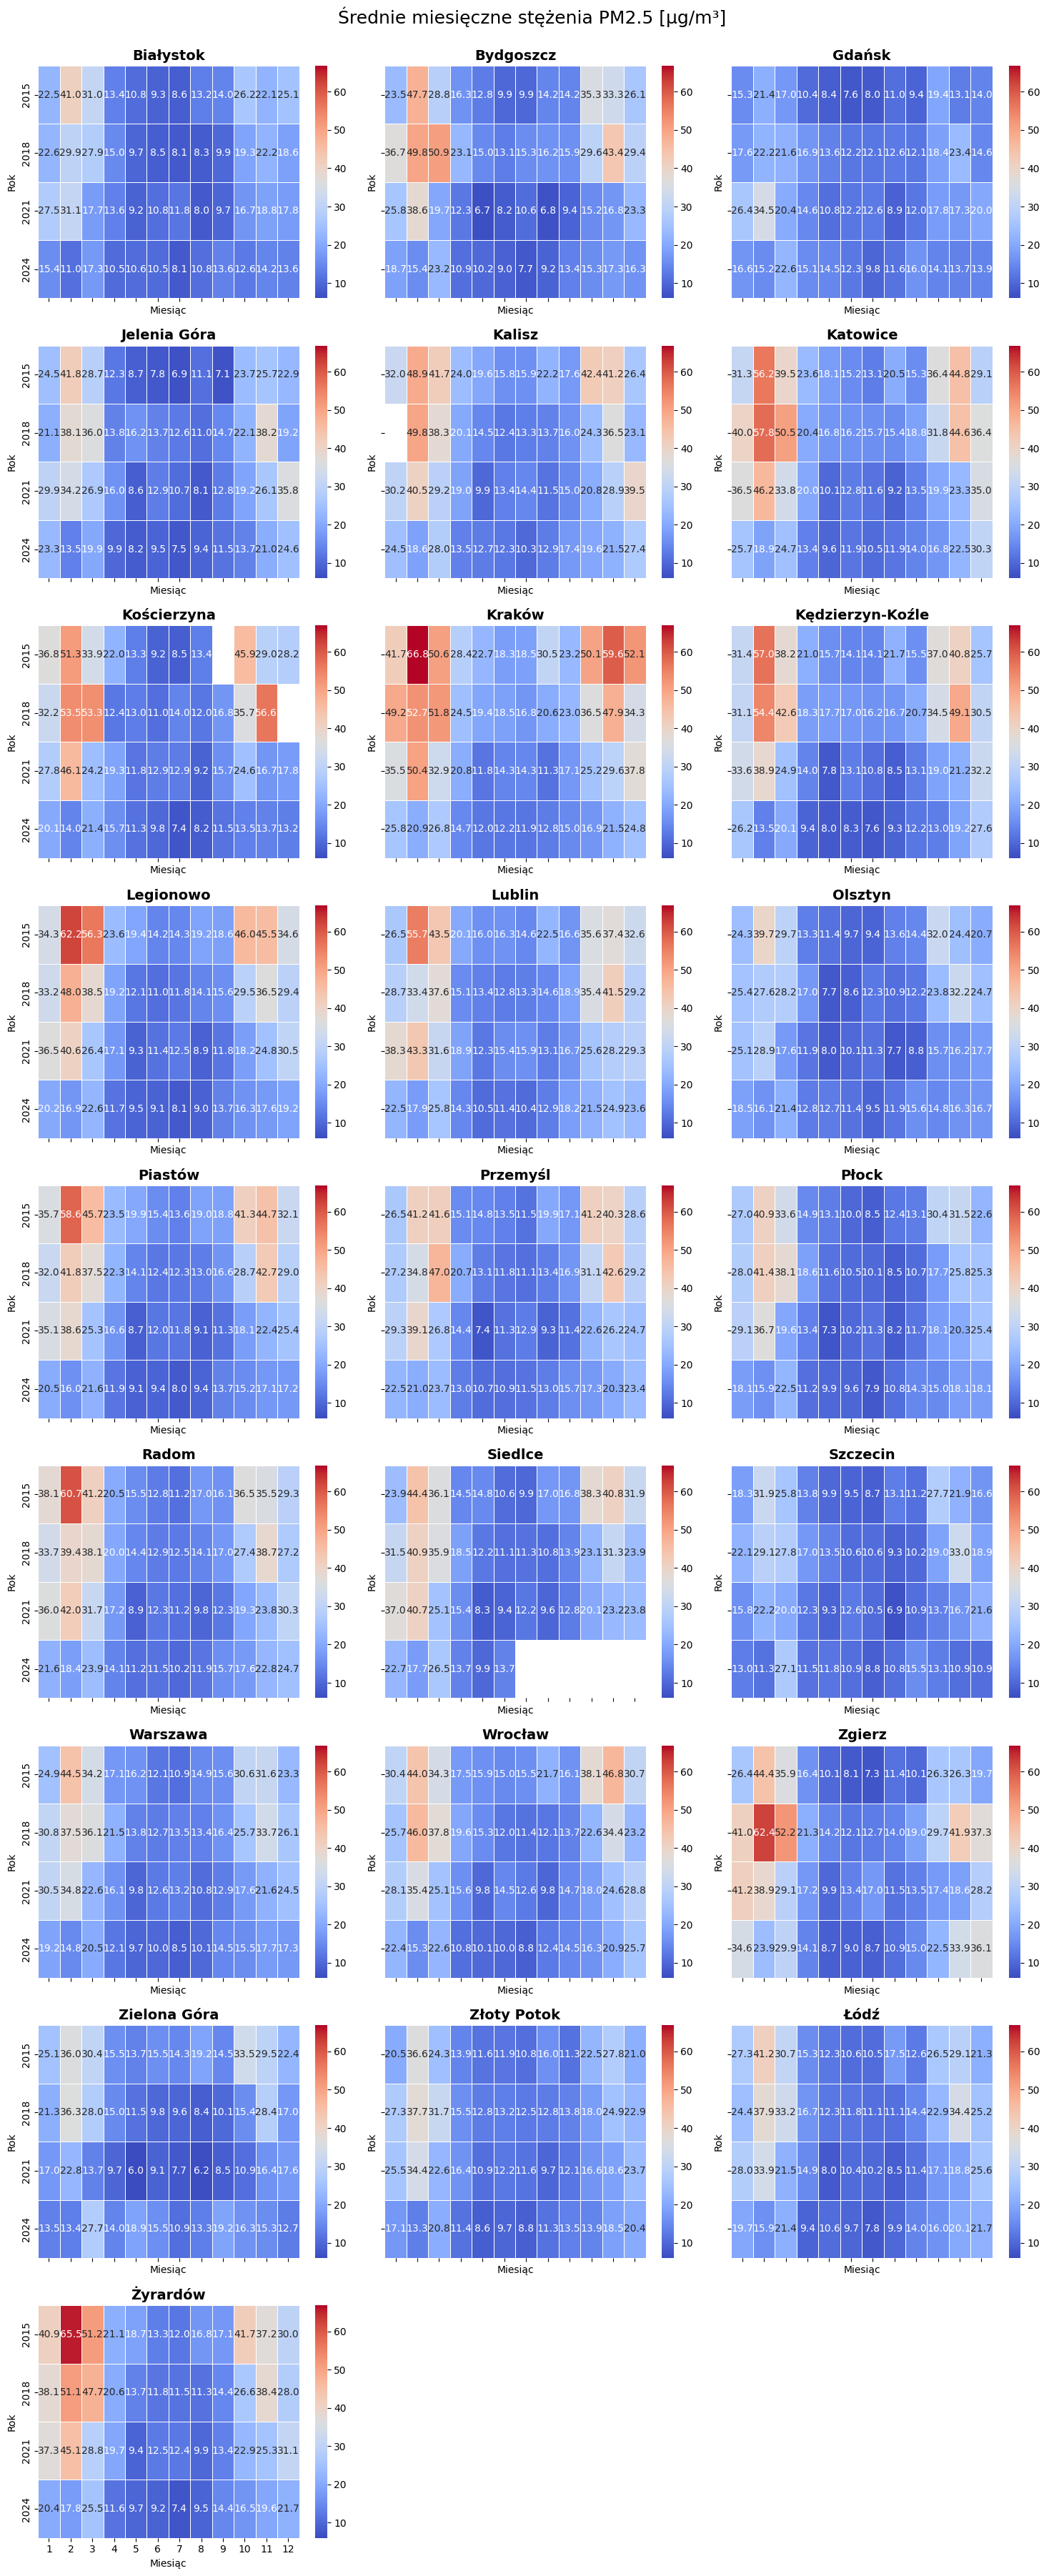

In [26]:
df_heat = data_statistics.prepare_heatmap_data(df_final, years_to_analize)

display(df_heat.head())

data_statistics.plot_city_heatmaps(df_heat)

Wnioski:

(znów podobne jak przy projekcie 1)

Patrząc na wszystkie wykresy razem widzimy, że najwięcej koloru czerwonego jest w wierszach z latami 2015/2018. Najwyższe stężenia PM2.5 można zauważyć np. w miastach Kędzierzyn Koźle czy Wrocław (południe Polski). Podobnie jak w zadaniu 2 - najwyższe wartości są odnotowane w miesiącach zimowych. 

## Zadanie 4.

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: https://airscan.org/new-who-air-quality-guidelines-2021/). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj grouped barplot, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

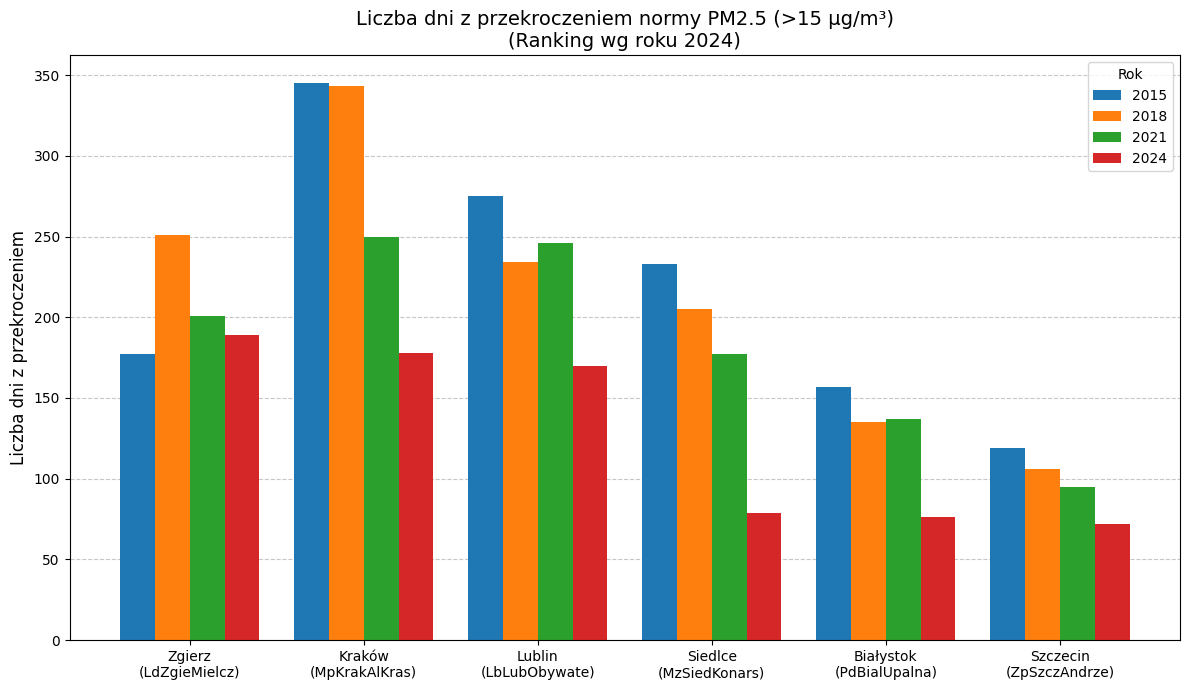

In [27]:
wynik_przekroczenia = data_statistics.calculate_daily_exceedances(df_final)

data_statistics.plot_manual_bars(wynik_przekroczenia, ranking_year=2024, years_to_analyze=years_to_analize)


## Zadanie 5.

Przygotuj kod, który wygeneruje wykres pokazujący liczbę dni z przekroczeniem normy stężenia PM2.5 (średnie dzienne stężenie) grupując dane po województwach.

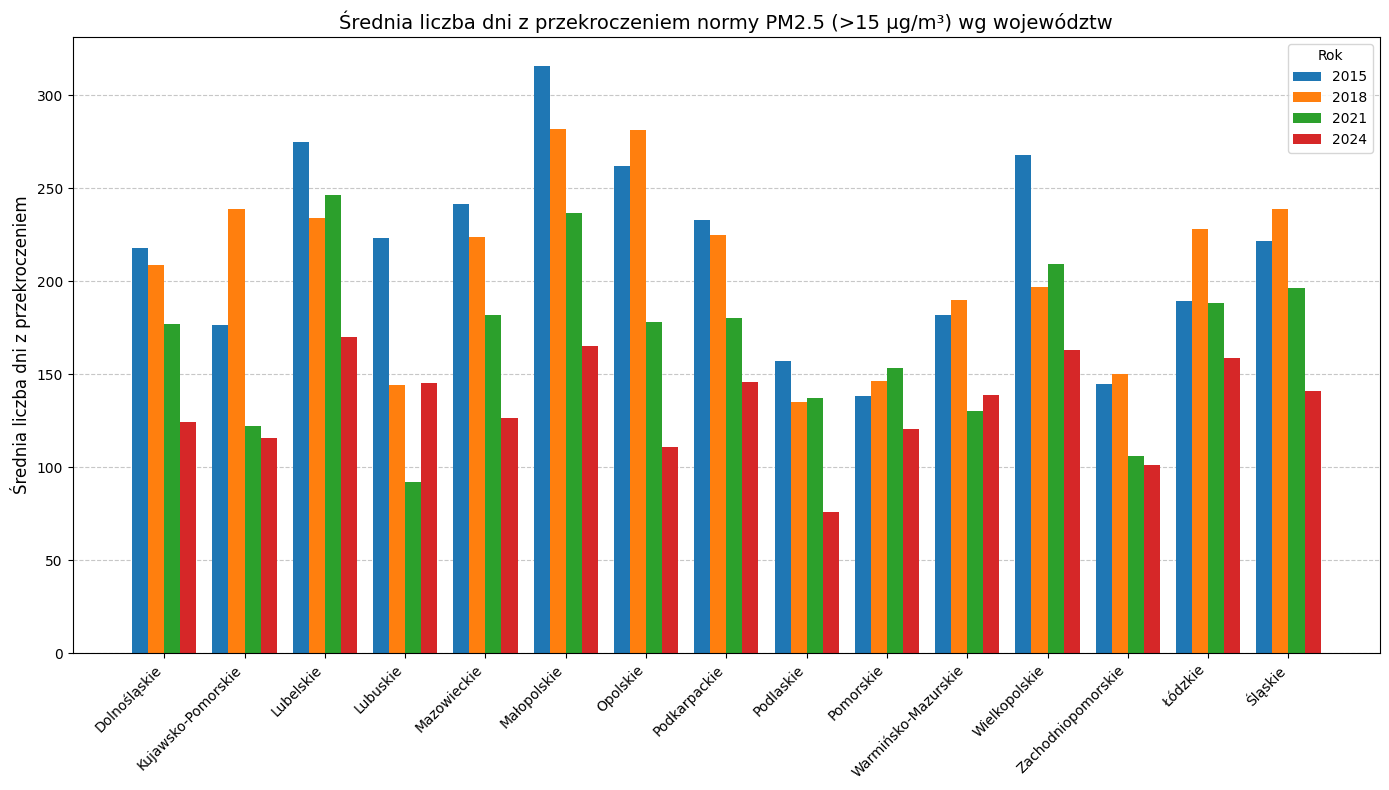

In [28]:
data_statistics.plot_by_voivodeship(wynik_przekroczenia, df_meta, years_to_analize)